# Diagonally Weighted Least Squares

Haziq Jamil

In [ ]:
here::i_am("notebooks/dwls.qmd")


here() starts at /Users/haziqj/github_local/ligof-tests

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
This is lavaan 0.6-19
lavaan is FREE software! Please report any bugs.

Rows: 1,000
Columns: 5
$ y1 <ord> 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2…
$ y2 <ord> 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1…
$ y3 <ord> 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1…
$ y4 <ord> 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2…
$ y5 <ord> 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2…
 num [1:15] 0.00 0.00 0.00 1.11e-16 0.00 ...

By default, `{lavaan}` uses `estimator = "WLSMV"` for ordinal data, which uses DWLS to estimate the parameters plus a meand and variance correction for the standard errors.

## M2 statistic

In our paper, we describe this is as the variance-covariance free Wald test (WaldVCF).

In [ ]:
M2_test <- function(lavobject) {
  
  n <- nobs(lavobject)
  Delta2 <- create_Delta2_matrix(lavobject)
  Delta2comp <- mcompanion::null_complement(Delta2)
  Sigma2 <- lavaan.bingof:::create_Sigma2_matrix(lavobject)
  with(lavaan.bingof::get_uni_bi_moments(lavobject), {
    p2_hat <<- c(pdot1, pdot2)
    pi2_hat <<- c(pidot1, pidot2)
  })
  e2_hat <- p2_hat - pi2_hat

  C2 <-
    Delta2comp %*%
    MASS::ginv(t(Delta2comp) %*% Sigma2 %*% Delta2comp) %*%
    t(Delta2comp)

  M2 <- n * colSums(e2_hat * (C2 %*% e2_hat))
  df <- nrow(Delta2) - ncol(Delta2)
  pval <- pchisq(M2, df, lower.tail = FALSE)

  tibble(M2 = M2, df = df, pval = pval)
}

M2_test(fit)


# A tibble: 1 × 3
     M2    df   pval
  <dbl> <int>  <dbl>
1  10.3     5 0.0665

## Verification

In [ ]:
library(furrr)


Loading required package: future

Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available when loading
Warning in serialize(data, node$con, xdr = FALSE): 'package:dplyr' may not be
available whe

   some estimated ov variances are negative
   some estimated ov variances are negative

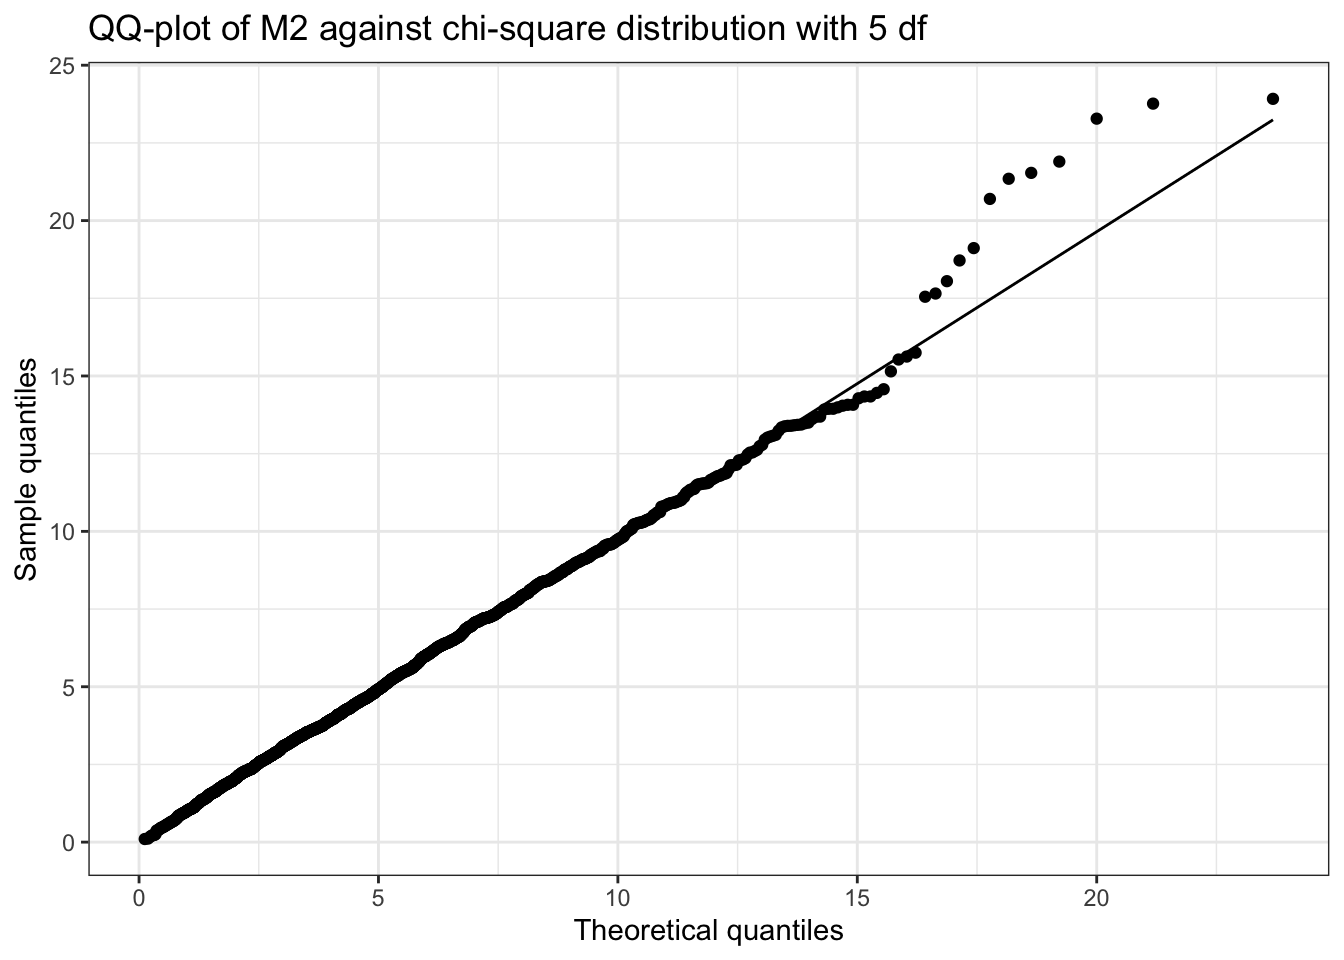

In [ ]:
bind_rows(res) |>
  ggplot(aes(sample = M2)) +
  stat_qq(distribution = qchisq, dparams = list(df = 5)) +
  stat_qq_line(distribution = qchisq, dparams = list(df = 5)) +
  labs(
    title = "QQ-plot of M2 against chi-square distribution with 5 df",
    x = "Theoretical quantiles",
    y = "Sample quantiles"
  ) +
  theme_bw()


ℹ Please use `after_stat(density)` instead.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

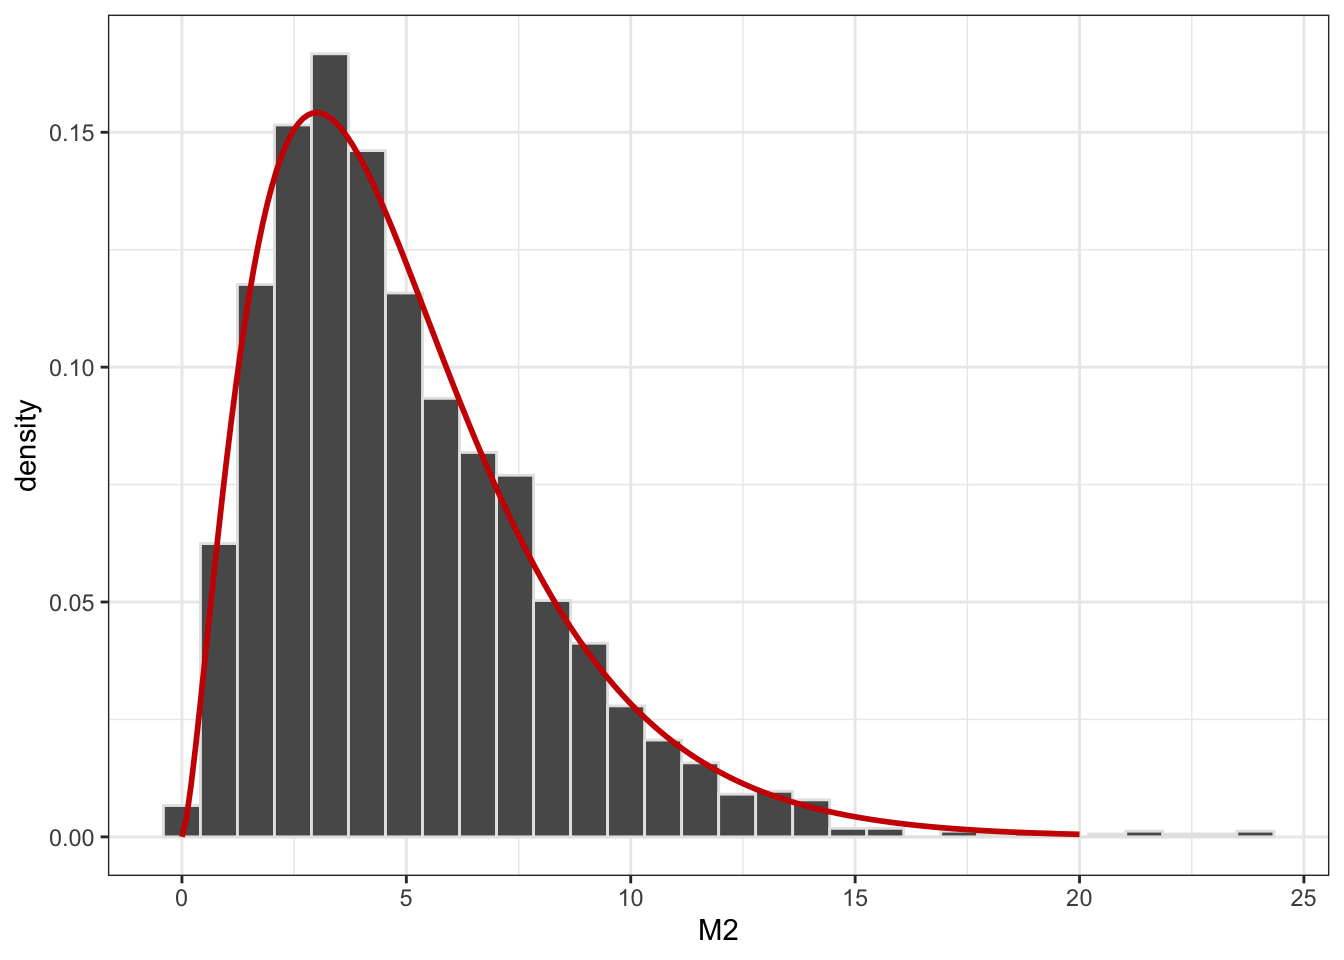

In [ ]:
bind_rows(res) |>
  ggplot(aes(x = M2, y = ..density..)) +
  geom_histogram(col = "gray90") +
  geom_line(
    data = tibble(x = seq(0, 20, 0.1), y = dchisq(x, df = 5)),
    aes(x, y),
    col = "red3",
    linewidth = 1
  ) +
  theme_bw()


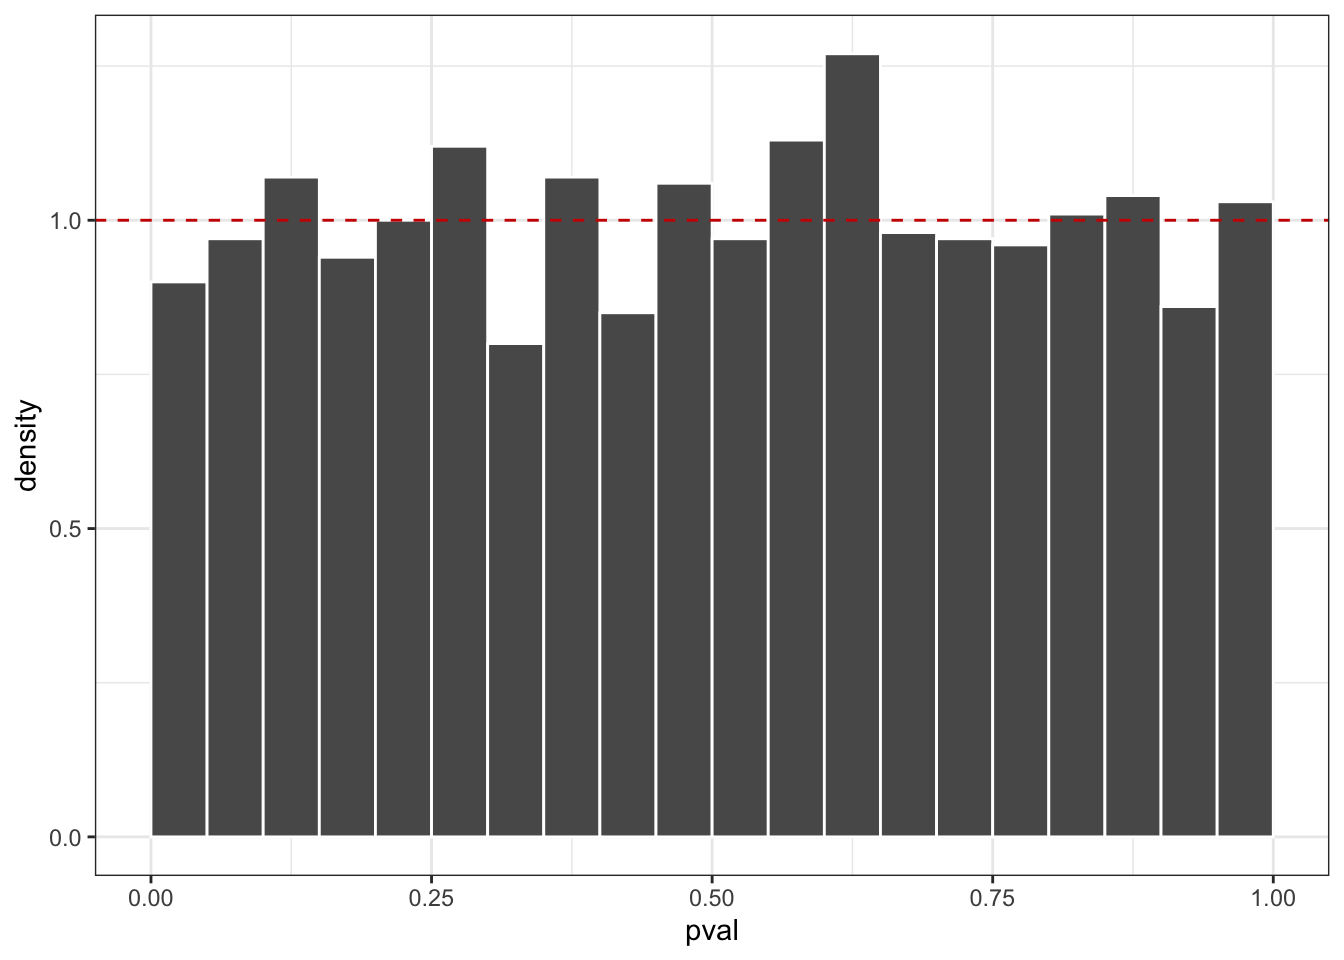

In [ ]:
bind_rows(res) |>
  ggplot(aes(x = pval, y = ..density..)) +
  geom_histogram(binwidth = 0.05, boundary = 0, col = "white") +
  geom_hline(yintercept = 1, col = "red3", linetype = "dashed") +
  theme_bw()
